In [2]:
import torch
import torchvision
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
from pathlib import Path

# Device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

### Dataloader

In [3]:
class CatsAndDogsDataset(Dataset):

    def __init__(self, target_directory, transform=None):
        self.paths = list(Path(target_directory).glob('*.*.jpg'))
        self.transform = transform
        self.classes = sorted(list(set(map(self.get_label, self.paths))))

    @staticmethod
    def get_label(path):
        filename = str(path.name)
        label = filename.split('.')[0]
        return label

    def load_image(self, index):
        image_path = self.paths[index]
        return Image.open(image_path)
    
    def __len__(self):
        return len(self.paths)

    def __getitem__(self, index):
        img = self.load_image(index)
        class_name = self.get_label(self.paths[index])
        class_idx = self.classes.index(class_name)

        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx


In [9]:
train_transforms = transforms.Compose([
    transforms.CenterCrop((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

train_dataset = CatsAndDogsDataset('./train', transform=train_transforms)

train_dataloader = DataLoader(dataset=train_dataset, batch_size=4, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([0, 1, 0, 1])


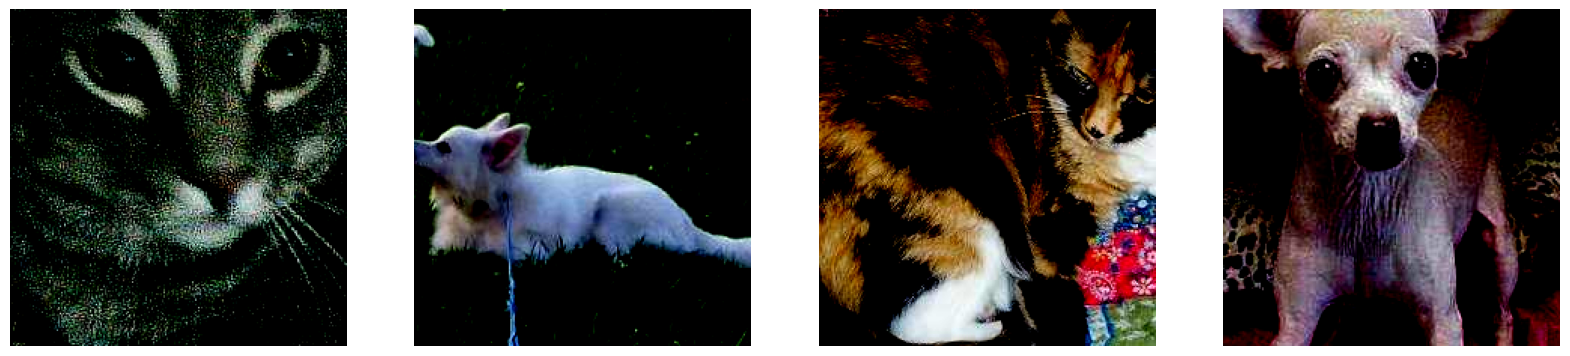

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(iter(train_dataloader))
print(labels)

plt.figure(figsize=(20, 5))

for i, img in enumerate(images, start=1):
    plt.subplot(1, 4, i)
    plt.imshow(img.permute((1,2,0)))
    plt.axis('off')

plt.show()
